https://stepik.org/lesson/1576173/step/8

Q = 0.93


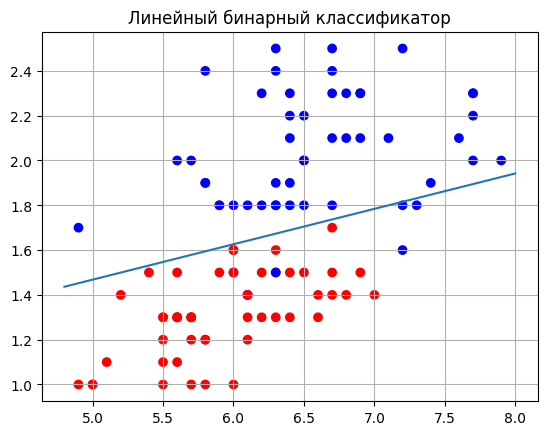

In [ ]:
import numpy as np
import torch
import torch.optim as optim

# Данные
x_train = torch.tensor([(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)])
y_train = torch.tensor([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])
y_train = y_train.float()

np.random.seed(1)    # установка "зерна"

# Параметры ГС
total = len(y_train) # размер обучающей выборки
n_features = 3       # число параметров w (w0, w1, w2)
lr = 0.1             # шаг обучения
N = 500              # число итераций
w = torch.empty(n_features).uniform_(-1e-5, 1e-5) # начальные значения вектора w
w.requires_grad_(True)                      # подключаем подсчёт градиента
loss_func = torch.nn.BCEWithLogitsLoss()    # функция потерь для бинарной классификации
optimizer = optim.Adam(params=[w], lr=lr)   # оптимизатор

# Матрица признаков под полином
X = torch.ones(len(y_train), 3) # матрица из единиц под три параметра
X[:, 1:3] = x_train             # первую единицу не трогаем, остальные заменяем

# ГС
for _ in range(N):
    k = np.random.randint(0, total) # случайный индекс для выбора образа
    y_pred = X[k] @ w               # предсказание по этому образу с текущими весами
    loss = loss_func(y_pred, y_train[k]) # потери с таким предсказанием
    loss.backward()                 # проход назад с подсчётом производных
    optimizer.step()                # шаг с заданным выше оптимизатором
    optimizer.zero_grad()           # чистим накопленный градиент

Q = (torch.round(torch.sigmoid(X @ w)) == y_train).sum().item() / len(y_train)
print('Q =', Q)

# График
import matplotlib.pyplot as plt
color = 'rb'
plt.scatter(x_train[:, 0], x_train[:, 1], c=[color[int(y)] for y in y_train])
x_plot = torch.linspace(4.8, 8.0, 10)
y_plot = ((-w[1] * x_plot - w[0]) / w[2]).detach().numpy()
plt.plot(x_plot, y_plot)
plt.grid()
plt.title('Линейный бинарный классификатор')
plt.show()